In [1]:
import os

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import tensorflow as tf

from tractoencoder_gsoc.models import vae_model
from tractoencoder_gsoc.models import ae_model

2024-07-23 14:18:45.725394: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-23 14:18:45.776724: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 14:18:46.470507: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
%matplotlib inline

In [3]:
# Path to model
project_dir = os.path.dirname(os.getcwd())
model_path = os.path.join(project_dir,
                          "data/trained_models/cond_vae_test_0",
                          "model_final.keras")
# Load model 
VAE = tf.keras.models.load_model(model_path, compile=False)

In [4]:
# Load tractogram
import tractoencoder_gsoc.utils as utils
tractograms = []
modes = ["train", "valid", "test"]

for mode in modes:
    tractogram_fibercup = os.path.join(project_dir,
                                       f"data/fibercup/fibercup_advanced_filtering_no_ushapes/ae_input_std_endpoints/{mode}/fibercup_Simulated_prob_tracking_minL10_resampled256_plausibles_std_endpoints_{mode}.trk")
    anat_fname = os.path.join(project_dir,
                              "data/fibercup/Simulated_FiberCup.nii.gz")
    os.path.exists(tractogram_fibercup)
    tractograms.append(utils.prepare_tensor_from_file(tractogram_fibercup, anat_fname))

In [5]:
# Assuming `encoder` is your encoder model and `data` is your dataset
latent_space_representations = []
for tractogram in tractograms:
    latent_space_representations.append(VAE.encoder(tractogram)[0])  # First element is z_mean


In [19]:

# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=2208,
            perplexity=30,
            early_exaggeration=12)
tsne_results = tsne.fit_transform(latent_space_representations[0])


(-68.52229824066163, 68.7471097946167, -72.551957321167, 80.00022239685059)

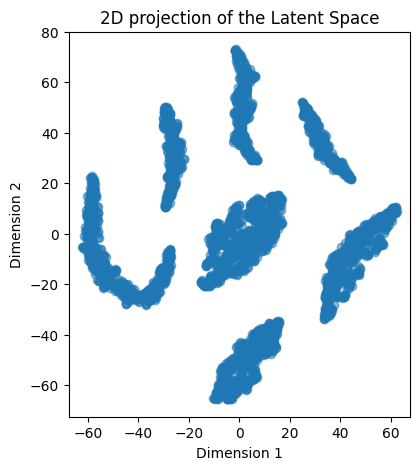

In [20]:

# Plot the results
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131)
ax.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
ax.set_title('2D projection of the Latent Space')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.axis('equal')

# ax = fig.add_subplot(132)
# ax.scatter(tsne_results[:, 0], tsne_results[:, 2], alpha=0.5)
# ax.set_title('2D projection of the Latent Space')
# ax.set_xlabel('Dimension 1')
# ax.set_ylabel('Dimension 3')

# ax = fig.add_subplot(133)
# ax.scatter(tsne_results[:, 1], tsne_results[:, 2], alpha=0.5)
# ax.set_title('2D projection of the Latent Space')
# ax.set_xlabel('Dimension 2')
# ax.set_ylabel('Dimension 3')
# ax.axis('equal')
# plt.show()